NPM: 6182001039

Nama: Wilson

# Regresi (2)

Fungsi `my_gls(x,y,n)` adalah fungsi untuk membuat model regresi linear secara umum. 

**Tugas 1:** Lengkapilah fungsi `my_gls(x,y,n)` berikut ini! Anda boleh mneggunakan fungsi invers, transpose dan lainnya yang sudah tersedia di library `numpy`.

source untuk fungsi invers di `numpy`: https://www.geeksforgeeks.org/how-to-inverse-a-matrix-using-numpy/

In [38]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
def my_gls(x,y,n):
    """
    x : merupakan vektor x
    y : merupakan vektor y (panjang x dan y sama)
    n : merupakan derajat dari polinom yang akan dibuat
    
    return value: sebuah array yang merupakan koefisien dari regresi linear (pada kasus ini menyatakan a0 dan a1)
    """

    xi = np.zeros(n+2)
    yi = np.zeros(n+1)
    
    for i in range (n+2):
        xi[i] = np.sum(x**2(i+1))

    for i in range (n+1):
        if (i == 0):
            yi[i] = np.sum(y)
        else:
            yi[i] = np.sum((x**i) * y)

    m_cons = np.zeros((n+1 , n+1), dtype = float)

    for i in range (len(m_cons)):
        curr = 0
        if (i == 2):
            curr = 1
        for i in range (len(m_cons[i])):
            if (i==0 and j == 0):
                m_cons[i, j] = N
            else :
                m_cons[i,j] - xi[curr]
                curr += 1
    m_coef = np.zeros((n+1))
    for i in range (len(m_coef)):
        m_coef[9,]

    return m_cons, m_coef

In [ ]:
def EG(A, B):
   
    N = A.shape[0]

    for i in range(1, N):
        for j in range (i+1, N):
            temp = A[j, i]/A[i, i]
            A[j, :] = A[j, :] - temp*A[i, :]
            B[j] = B[j] - temp*B[i]
    
    return A, B

In [ ]:
def back_sub(A,B):

    A, B = my_gls(A, B)
    N = A.shape[0]
    x = np.zeros(N, float)
    x[N] = B[N] / A[N, N]
    for i in range(N, 0, 0):
        x[i] = B[i]
        for j in range(i + 1, N-1):
            x[i] = x[i] - A[i][j] * x[j]
        x[i] = x[i]/A[i][i]
    
    return x

In [ ]:
def solve(A,B):
     result = back_sub(A, B)

**Tugas 2**: Lengkapilah fungsi my_predict(x,A) untuk menghitung hasil dari regresi!

In [ ]:
def my_predict(x,A):
    """
    x : merupakan vektor x
    A : vektor koefisien untuk model regresi
    
    return value: sebuah array yang merupakan hasil regresi dari vektor x
    """
    N = len(x)
    a = len(A)
    res = np.zeros(N, dtype=float)
    for i in range (N):
        for j in range(a):
            res[i] += A[i] * (x[i]**j)
    return res 


**Tugas 3**: Lengkapilah fungsi `my_Sr(ymodel,ytrue)` untuk mengembalikan sum of square error!

In [ ]:
def my_Sr(ymodel, ytrue):
    """
    ymodel : vektor y hasil regresi
    ytrue  : vektor y yang sesungguhnya
    
    return value: sum of square error
    """
    res = np.sum((ymodel-ytrue)**2)
    return res

# Data Frame

Untuk modul ini, Anda perlu memasukkan data yang berupa file csv. Untuk memasukkan data csv, Anda dapat menggunakan fungsi `read_csv` yang tersedia di library `pandas`.

Source untuk belajar `pandas`: https://www.w3schools.com/python/pandas/pandas_csv.asp

Contoh membaca file csv: `pd.read_csv('C:/Nata/UNPAR 2021/Metnum 2021 2022/Dataset/data.csv')`

In [5]:
import pandas as pd

#Bacalah file data.csv yang disediakan dan simpan dalam variabel data
data = pd.read_csv('C:/Users/anton/OneDrive/Documents/Semester 4/Metode Numerik/data.csv')

File csv tersimpan sebagai data frame. DataFrame adalah **tabel** yang memiliki baris dan kolom. Untuk mendapatkan info kolom dari DataFrame yang akan Anda analisis, Anda dapat menggunakan sintaks:

`<nama_dataframe>.info()`

Gunakan kode program berikut untuk melihat informasi dari DataFrame `data` dan perhatikan hasilnya.

## Akses Kolom dan Baris pada Data Frame

Pada bagian ini, kita akan membahas bagaimana mengakses kolom yang terdapat pada DataFrame. Sintaks untuk mengakses kolom pada DataFrame adalah:

`<nama_dataframe>["<label_kolom>"]`

Jika ingin mengakses lebih dari 1 kolom, maka gunakan sintaks berikut ini:

`<nama_dataframe>[["<label_kolom1>","<label_kolom2>",...,"<label_kolom3>"]]`

Cobalah sintaks berikut ini:

In [6]:
print(data["x"])
print(data[["x","y"]])

0      23
1       7
2      72
3       7
4       7
       ..
127    67
128    68
129    71
130     7
131     7
Name: x, Length: 132, dtype: int64
      x     y
0    23   402
1     7  2759
2    72  2795
3     7  2810
4     7  2819
..   ..   ...
127  67  2479
128  68  2516
129  71  2559
130   7  2724
131   7  2751

[132 rows x 2 columns]


Untuk mengakses baris gunakan perintah: `<nama data frame>.iloc[<baris yang akan diakses>]` 
silakan pelajari: https://www.w3schools.com/python/pandas/pandas_dataframes.asp

Cobalah sintaks berikut ini:

In [31]:
data.iloc[1:3]

,Unnamed: 0,x,y
1,2,7,2759
2,3,72,2795


# Mencari Model Terbaik


**Tugas 4:** Dari data `data.csv`, carilah model regresi terbaik dengan `x` sebagai variabel bebasnya dan `y` sebagai variabel terikat. Cobalah untuk beberapa jenis polinom (silakan tentukan sendiri derajat polinom yang akan Anda coba). Sebelumnya cobalah dulu membuat plot untuk menentukan model apa yang kira-kira akan cocok. Untuk setiap model gunakan k-fold cross validation dengang k = 6. Hitung rata-rata $S_r$ untuk masing-masing model dan tentukan yang terbaik.

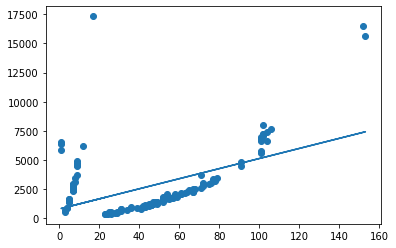

In [33]:
# Lengkapi kode Anda untuk menjawab Tugas 4 di sini.
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 

x = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values 

lin_reg = LinearRegression()
lin_reg.fit(x, y) 


poly_regr = PolynomialFeatures(degree = 2) 
X_poly = poly_regr.fit_transform(x) 
lin_reg_2 = LinearRegression() 
lin_reg_2.fit(X_poly, y)


N = np.size(x) 
plt.scatter(x, y)
plt.plot(x, lin_reg.predict(x))
plt.show() 


